In [1]:
import numpy as np

## Shortest path - Source to Destination

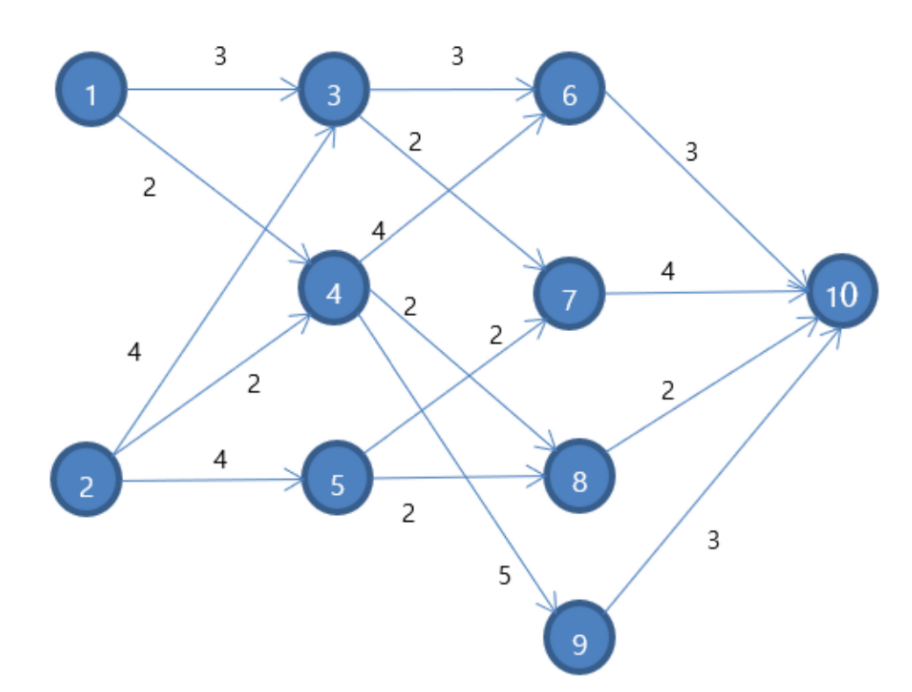

In [55]:
# creating distance matrix
n_nodes = 10
dist_mat = 100*np.ones((n_nodes+1, n_nodes+1))
# dist_mat[0, [1, 2]] = [100, 0]
dist_mat[0, [1, 2]] = [0, 100]
dist_mat[1, [3, 4]] = [3, 2]
dist_mat[2, [3, 4, 5]] = [4, 2, 4]
dist_mat[3, [6, 7]] = [3, 2]
dist_mat[4, [6, 8, 9]] = [4, 2, 5]
dist_mat[5, [7, 8]] = [2, 2]
dist_mat[6, 10] = 3
dist_mat[7, 10] = 4
dist_mat[8, 10] = 2
dist_mat[9, 10] = 3

# removing the first row and first columns
# dist_mat = dist_mat[1:, 1:]
dist_mat

array([[100.,   0., 100., 100., 100., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100.,   3.,   2., 100., 100., 100., 100., 100., 100.],
       [100., 100., 100.,   4.,   2.,   4., 100., 100., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100.,   3.,   2., 100., 100., 100.],
       [100., 100., 100., 100., 100., 100.,   4., 100.,   2.,   5., 100.],
       [100., 100., 100., 100., 100., 100., 100.,   2.,   2., 100., 100.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,   3.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,   4.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,   2.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,   3.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.]])

In [189]:
# since there are fixed steps needed to reach destination
# fixed number of iterations will work
steps = 4

# V = np.zeros((n_nodes+1, n_nodes+1))
# U = np.zeros((n_nodes+1, n_nodes+1))

route = np.zeros(steps+1)
route[steps] = n_nodes
dist = np.zeros(steps+1)
# print(route, dist)

for t in reversed(range(steps)):
    # print(route, t)
    possible_distance = dist[t+1] + dist_mat[:, int(route[t+1])]
    # print(possible_distance)

    dist[t] = np.min(possible_distance)
    route[t] = np.argmin(possible_distance)
    # print(dist[t], route[t])

print(route)

[ 0.  1.  4.  8. 10.]


In [190]:
dist

array([6., 6., 4., 2., 0.])

## Happiness Maximization

Martin has 5 cakes and he can eat them within 3 days. Martin likes whole cake, so each day he eats an integer number of cakes or nothing. His happiness from eating i cakes on day t is 0.7(t-1)√𝑖. For example, if he eats 2 cakes on day 2, he will gain a utility of 0.71  √2.  Martin wants to maximize his total happiness, which is the sum of happiness from day 1 to day 3. How many cakes does Martin eat on the first day?

In [31]:
delta = 0.7

def happiness(i, t):
    return delta**(t-1)*np.sqrt(i)

days = 4
cakes = 5

# value function
V = np.zeros((cakes+1, days))

# best choice
U = np.zeros((cakes+1, days))

# terminal condition
# V[:, -1] = 0
# U[:, -1] = 0

In [32]:
# loop backwards in time
# to get last state variables so we can iterate overall all the possible states
for t in reversed(range(days-1)): 
    for s in range(cakes+1):
        i_list = np.arange(s+1)
        happiness_vals = happiness(i_list, t) + V[s - i_list ,t+1]
        V[s, t] = np.max(happiness_vals)
        U[s, t] = np.argmax(happiness_vals)

In [35]:
s = cakes
overall_happiness = 0
for t in range(days-1):
    i = U[s, t]
    inc_hap = happiness(i, t)
    print('For day ', t+1, 'No of cakes to eat', i)
    s -= int(U[s, t])
    overall_happiness += inc_hap
    
print('Total happiness is', np.round(overall_happiness, 2))

For day  1 No of cakes to eat 3.0
For day  2 No of cakes to eat 1.0
For day  3 No of cakes to eat 1.0
Total happiness is 4.17


## Oil output

At the beginning of year 1, your oil company owns 100 barrels of oil reserves. During year t (t = 1,2,..,10), the following events occur each year: (1) you extract and refine xt barrels and incur cost x2t : (2) you sell those xt barrels at a price of pt dollars per barrel; and (3) exploration for new reserves results in the discovery of bt barrels of new reserves. xt is your decision at time t. pt and bt are known and given. Also, 1 dollar at time t+1 is worth d dollars at time t.

 

Clearly write down the state variables, dynamics, and dynamic programming (Bellman) Equation that you would use to solve the problems. Do not forget to include the terminal conditions (boundary conditions) that are necessary to solve the Bellman equation backward in time. Take a picture and upload it here.